In [1]:
import uqtestfuns as uqtf
import matplotlib.pyplot as plt
import numpy as np

(prob-input:univariate-distributions:normal)=
# Normal (Gaussian) Distribution

The normal (or Gaussian) distribution is a two-parameter continuous probability
distribution.
The table below summarizes some important aspects of the distribution.

|                      |                                                                                                                                  |
|---------------------:|----------------------------------------------------------------------------------------------------------------------------------|
|         **Notation** | $X \sim \mathcal{N}(\mu, \sigma)$                                                                                                |
|       **Parameters** | $\mu \in \mathbb{R}$ (mean, or location parameter)                                                                               |
|                      | $\sigma > 0$ (standard deviation, or scale parameter)                                                                            |
|  **{term}`Support`** | $\mathcal{D}_X = (-\infty, \infty)$                                                                                              |
|      **{term}`PDF`** | $f_X (x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \exp \left[ -\frac{1}{2} {\left(\frac{x - \mu}{\sigma}\right)}^2 \right] $ |
|      **{term}`CDF`** | $F_X (x; \mu, \sigma) = \frac{1}{2} \left[ 1 + \mathrm{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}}\right) \right]$                |
|     **{term}`ICDF`** | $F^{-1}_X (x; \mu, \sigma) = \mu + \sqrt{2} \, \sigma \, \mathrm{erf}^{-1}(2 x - 1)$                                             |

```{admonition} error function ($\mathrm{erf}$)

The error function appearing in the formula for CDF above is defined as

$$
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$

and whose domain is $[-1, 1]$.
```

The plots of probability density functions (PDFs),
sample histogram (of $5'000$ points),
cumulative distribution functions (CDFs),
and inverse cumulative distribution functions (ICDFs) for different parameter
values are shown below.

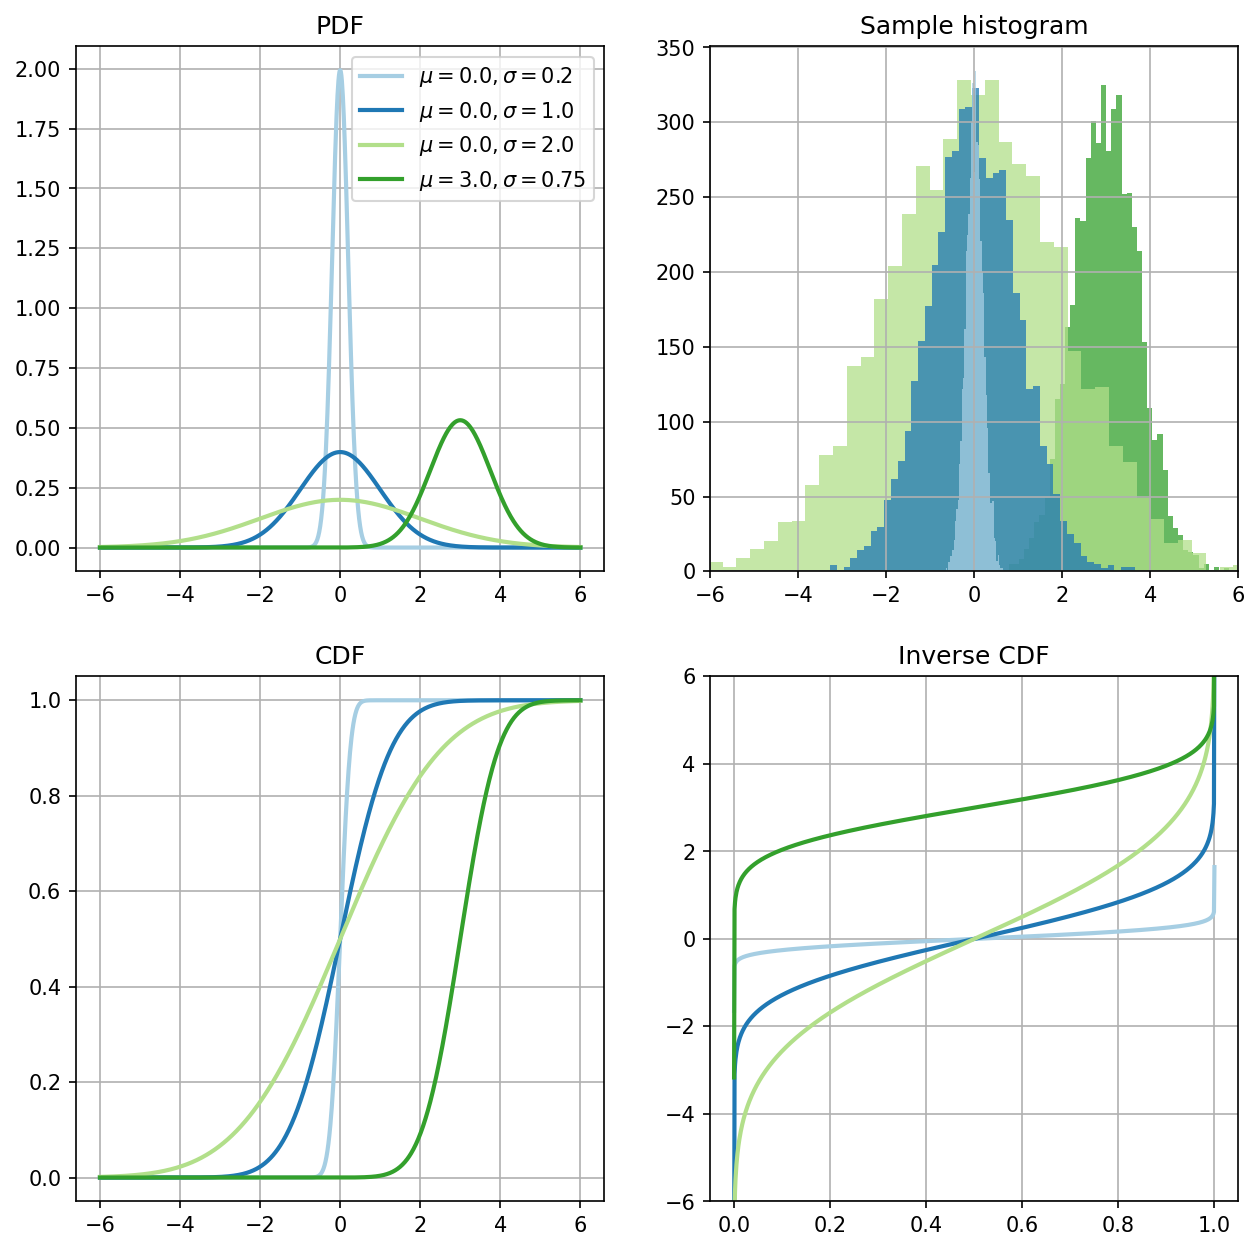

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

parameters = [[0, 0.2], [0, 1.0], [0, 2.0], [3, 0.75]]
colors = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c"]

univ_dists = []
for parameter in parameters:
    univ_dists.append(uqtf.UnivDist(distribution="normal", parameters=parameter))

fig, axs = plt.subplots(2, 2, figsize=(10,10))

# --- PDF
xx = np.linspace(-6, 6, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[0, 0].plot(
        xx,
        univ_dist.pdf(xx),
        color=colors[i],
        label=f"$\\mu = {univ_dist.parameters[0]}, \\sigma={univ_dist.parameters[1]}$",
        linewidth=2,
    )
axs[0, 0].legend();
axs[0, 0].grid();
axs[0, 0].set_title("PDF");

# --- Sample histogram
sample_size = 5000
np.random.seed(42)
for col, univ_dist in zip(reversed(colors), reversed(univ_dists)):
    axs[0, 1].hist(
        univ_dist.get_sample(sample_size),
        color=col,
        bins="auto",
        alpha=0.75
    )
axs[0, 1].grid();
axs[0, 1].set_xlim([-6, 6]);
axs[0, 1].set_title("Sample histogram");

# --- CDF
xx = np.linspace(-6, 6, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 0].plot(
        xx,
        univ_dist.cdf(xx),
        color=colors[i],
        linewidth=2,
    )
axs[1, 0].grid();
axs[1, 0].set_title("CDF");

# --- Inverse CDF
xx = np.linspace(0, 1, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 1].plot(
        xx,
        univ_dist.icdf(xx),
        color=colors[i],
        linewidth=2
    )
axs[1, 1].grid();
axs[1, 1].set_ylim([-6, 6]);
axs[1, 1].set_title("Inverse CDF");

plt.gcf().set_dpi(150)

(prob-input:univariate-distributions:normal:standard)=
## Standard normal distribution

A normal distribution of particular importance is the _standard normal distribution_
whose mean and standard deviation are $0.0$ and $1.0$, respectively.
The PDF and CDF of the standard normal distribution are usually denoted as
$\phi$ and $\Phi$.
That is

$$
\phi(x) = \frac{1}{\sqrt{2 \pi}} \exp{\left[ - \frac{x^2}{2} \right]},
$$

$$
\Phi(x) = \frac{1}{2} \left[ 1 + \mathrm{erf}\left( \frac{x}{\sqrt{2}}\right) \right],
$$

and

$$
\Phi^{-1}(x) = \sqrt{2} \mathrm{erf}(2 x - 1).
$$


Any normally distributed random variable can be cast as a transformation
of the standard normal distribution.
Specifically,
the random variable $X \sim \mathcal{N}(\mu, \sigma)$ can be written as

$$
X = \mu + \sigma Z,
$$

where $Z \sim \mathcal{N}(0, 1)$.